In [1]:
#Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
##Sets Pandas to truncate dataframes
pd.set_option("display.max_rows", 10)

In [2]:
##Sets Pandas to not truncate dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
#Input Paths
colordata = 'dataformodel/colorvisibility.csv'
cleaneddata = 'Output/deepcleanedmini.csv'

In [5]:
#Read In CSV
color_df = pd.read_csv(colordata)
color_df

,Color,Visibility,Tickets
0,Black,1.0,98291
1,Brown,2.0,15744
2,Burgundy,3.0,1161
3,Blue,4.0,9836
4,Red,10.0,19419
5,Green,6.0,6524
6,Gold,6.0,2443
7,Gray,3.0,77618
8,Silver,7.0,11291
9,Purple,4.0,427


In [6]:
color_df2 = color_df.drop(columns=['Color'])
color_df2

,Visibility,Tickets
0,1.0,98291
1,2.0,15744
2,3.0,1161
3,4.0,9836
4,10.0,19419
5,6.0,6524
6,6.0,2443
7,3.0,77618
8,7.0,11291
9,4.0,427


In [7]:
X = color_df2.drop("Tickets", axis=1)
y = color_df["Tickets"]
print(X.shape, y.shape)

(15, 1) (15,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train, y_train)

C:\Users\Ly Li\.conda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.45454545454545453
Testing Data Score: 0.0


In [12]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [ 427  447 6524  447]
First 10 Actual labels: [9836, 77618, 2443, 1161]


In [13]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,427,9836
1,447,77618
2,6524,2443
3,447,1161


In [14]:
error = y_test - predictions
error

3     9409
7    77171
6    -4081
2      714
Name: Tickets, dtype: int64

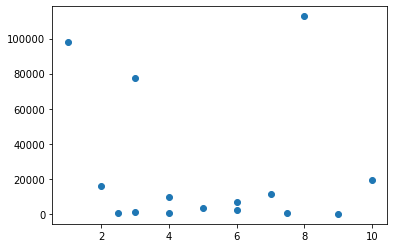

In [15]:
plt.scatter(X, y)